In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Hands-on implementation of anomaly detection**

So far now we have discussed anomaly detection which is a method by which we can point out or highlight some unwanted instances or events or unusual processes. In this section, we are going to apply two anomaly detection algorithms to real-world datasets. The dataset that we have considered contains information on 25 different features of Credit card payment defaults. Using this dataset the task is to detect anomalies within it.

For this task, we are using two machine learning-based algorithms namely: Isolation forest (IF) and Local Outlier Factor (LOF). The IF detects the anomalies by isolation, in simple words, it understands how far the data point which is under observation from the rest of the data points. The LOF uses the Local density-based approach rather than the global density to separate the anomalies of the data.

The following steps are to be taken to detect anomalies in the given dataset.

**Step 1: Read and load the data**

Our dataset is stored in the CSV file, to read this data we are using the Pandas library. Now let’s first load the data and visualize the top 5 rows of it. 

In [2]:
# Import pandas
import pandas as pd

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Credit_Card.csv')

# Top 5 rows
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


shape of the dataset

In [4]:
data.shape

(30000, 25)

As we can see there are a total of 30000 records and 25 features or columns in the dataset.

**Step 2: Define training patterns**

Now let’s define the input training patterns which will be used to train the algorithms. There are a total of 25 features out of which as we can see in the 1st step the column named ID is irrelevant for the analysis and the last column gives information about whether the given customer will default payment or not (this feature is usually used in classification problems). So we have to eliminate these two columns and the rest will be used as input features to IF and LOF algorithms. 

In [5]:
# Set the features
X = data.iloc[:,1:-1].values
# Check the shape
X.shape
X1=data.iloc[:,1:-1]

As you can see we have successfully created a set of training features. 

Now before moving to the modelling let’s first check the distribution of one of the input features.  

Text(0, 0.5, 'Frequency of datapoints')

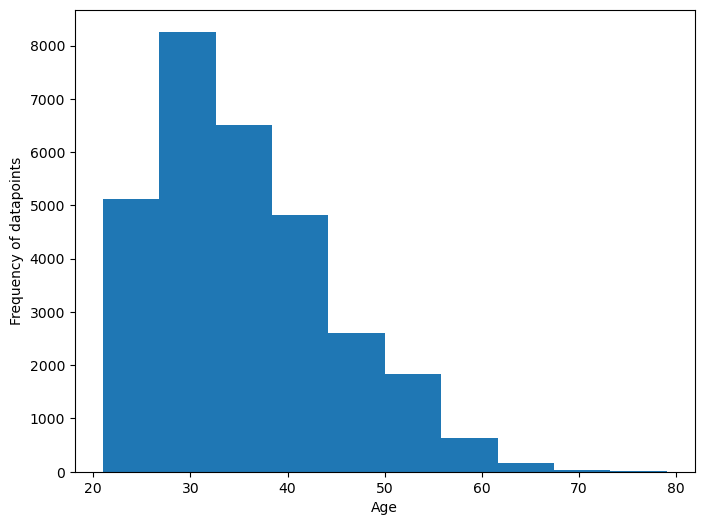

In [6]:
# import matplotlib
import matplotlib.pyplot as plt
# See how data is spreaded
plt.figure(figsize=(8,6))
plt.hist(X[:,4])
plt.xlabel('Age')
plt.ylabel('Frequency of datapoints')

**Step 3: Initialize and train the IF and LOF**

Now we will import the Isolation forest and Local outlier factor from the sklearn library and will train those on our training pattern which is defined in the above step.

In [7]:
# Import IF and LOF
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
# Initialize and train the IF
IF = IsolationForest(random_state=0)
IF.fit(X)

IsolationForest(random_state=0)

In [8]:
# Initialize and train LOF
LOF = LocalOutlierFactor()
LOF.fit(X)

LocalOutlierFactor()

**Step 4: Predicting and plotting anomalies**

We have successfully trained both algorithms, here we will now obtain the prediction from each algorithm and will plot anomalies.

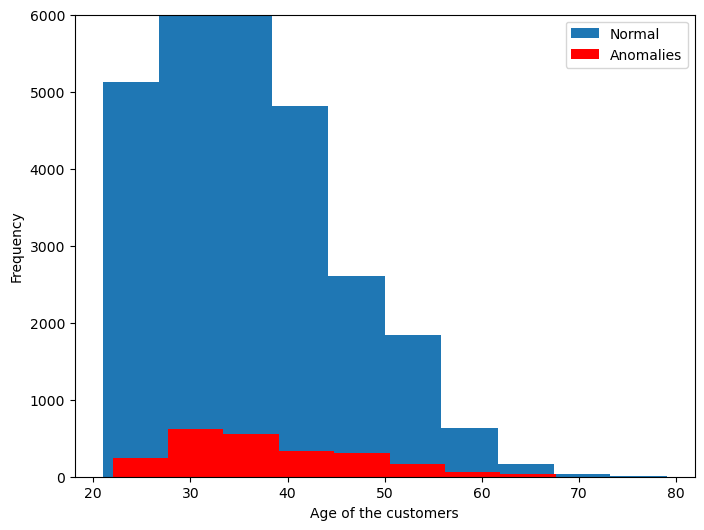

In [9]:
# Anomalies given by IF
IF_anomalies = IF.predict(X)
  
# Plotting anomalies given by IF
plt.figure(figsize=(8,6))
plt.hist(X[:,4],label='Normal')
plt.hist(X[IF_anomalies==-1][:,4], color='red', label='Anomalies')
plt.xlabel('Age of the customers')
plt.ylabel('Frequency')
plt.ylim((0,6000))
plt.legend()

In the above plot given by Isolation forest, the distribution in red colour represents anomalies, we can read it as around 2300 customers from age 21 to 67 are something which is insignificant or abnormal.  

Now let’s plot anomalies identified by the LOF.

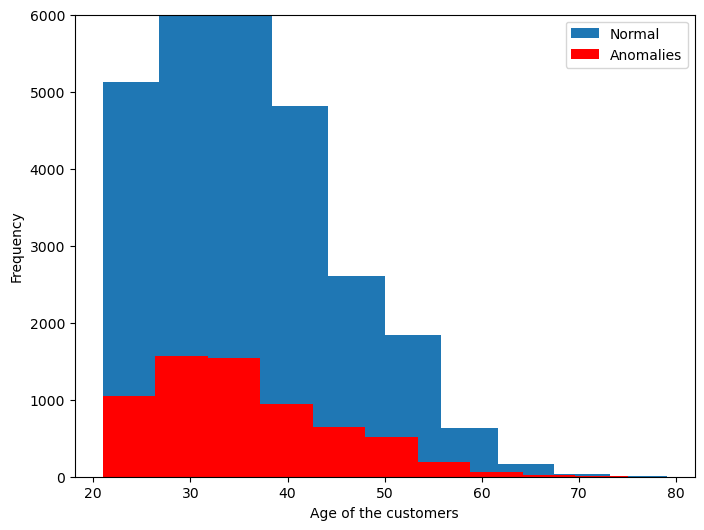

In [10]:
# Anomalies given by the LOF
LOF_anomalies = LOF.fit_predict(X)
# Plotting anomalies given by LOF
plt.figure(figsize=(8,6))
plt.hist(X[:,4],label='Normal')
plt.hist(X[LOF_anomalies==-1][:,4], color='red', label='Anomalies')
plt.xlabel('Age of the customers')
plt.ylabel('Frequency')
plt.ylim((0,6000))
plt.legend()

In [11]:
anom=pd.DataFrame(X[IF_anomalies==-1],columns=X1.columns)
anom.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,500000.0,1.0,1.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,...,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0
1,320000.0,1.0,1.0,1.0,49.0,0.0,0.0,0.0,-1.0,-1.0,...,194663.0,70074.0,5856.0,195599.0,10358.0,10000.0,75940.0,20000.0,195599.0,50000.0
2,500000.0,2.0,2.0,1.0,54.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,22722.0,7521.0,71439.0,8981.0,4152.0,22827.0,7521.0,71439.0,981.0,51582.0
3,500000.0,1.0,1.0,1.0,58.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,31130.0,3180.0,0.0,5293.0,5006.0,31178.0,3180.0,0.0,5293.0,768.0
4,360000.0,1.0,1.0,2.0,33.0,0.0,0.0,0.0,0.0,0.0,...,206895.0,628699.0,195969.0,179224.0,10000.0,7000.0,6000.0,188840.0,28000.0,4000.0


In [12]:
anom.shape

(2322, 23)

As you can see the anomalies identified by the LOF are between the ages of 21 to 69 and those are around 6544. From the above two outputs, it looks like the LOF is giving more information on anomalies. The quality of both results can be well assed by the domain expert. 

So this is how we can use Isolation forest and Local outlier factors to detect anomalies in the real-world datasets. 